```{bash}
pip install --upgrade --force-reinstall git+https://github.com/HCDigitalScholarship/intervals.git@main 
```

```
pip uninstall intervals
```

In [42]:
import intervals as ci # crim intervals
import music21 as m21
import pandas as pd

import re

import os, glob
from tqdm import tqdm

import matplotlib.pyplot as plt

In [24]:
us = m21.environment.UserSettings()
us.getSettingsPath()
us["musescoreDirectPNGPath"] = "/home/fmoss/.local/bin/mscore"

In [25]:
c = m21.chord.Chord(["C4", "E4", "G4"])

In [26]:
hexa = ci.analysis.neoRiemannian.completeHexatonic(c, simplifyEnharmonics=True)
hexa

[<music21.chord.Chord C4 E-4 G4>,
 <music21.chord.Chord C4 E-4 A-4>,
 <music21.chord.Chord B3 D#4 G#4>,
 <music21.chord.Chord B3 E4 G#4>,
 <music21.chord.Chord B3 E4 G4>,
 <music21.chord.Chord C4 E4 G4>]

In [27]:
for chord in hexa:
    chord.duration=m21.duration.Duration(1.)

In [28]:
s = m21.stream.Stream(hexa)

In [29]:
s.show("text")

{0.0} <music21.chord.Chord C4 E-4 G4>
{1.0} <music21.chord.Chord C4 E-4 A-4>
{2.0} <music21.chord.Chord B3 D#4 G#4>
{3.0} <music21.chord.Chord B3 E4 G#4>
{4.0} <music21.chord.Chord B3 E4 G4>
{5.0} <music21.chord.Chord C4 E4 G4>


In [30]:
s.show()

SubConverterFileIOException: /lib/x86_64-linux-gnu/libjack.so.0
/lib/x86_64-linux-gnu/libnss3.so
This application failed to start because it could not find or load the Qt platform plugin "offscreen"
in "".

Available platform plugins are: xcb.

Reinstalling the application may fix this problem.
/tmp/.mount_mscoreYmReE3/AppRun: line 26: 373572 Aborted                 (core dumped) "${APPDIR}/bin/mscore-portable" "$@"


In [31]:
# construct corpus following instructions here: https://github.com/RichardFreedman/CRIM_JHUB/blob/main/Make-me-a-Corpus.ipynb
# and https://github.com/RichardFreedman/CRIM_JHUB/blob/main/CRIM_04b_Cadences_Corpus.ipynb

import requests
raw_prefix = "https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/"
URL = "https://api.github.com/repos/CRIM-Project/CRIM-online/git/trees/990f5eb3ff1e9623711514d6609da4076257816c"
piece_json = requests.get(URL).json()
piece_list = [raw_prefix + p["path"] for p in piece_json["tree"]]

In [32]:
piece_list[:5]

['https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001.mei',
 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_1.mei',
 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_2.mei',
 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_3.mei',
 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0001_4.mei']

In [36]:
d = "data/"
if not os.path.exists(d):
    os.makedirs(d)

for piece in tqdm(piece_list):
    r = requests.get(piece)
    filename = piece.split("/")[-1]
    with open(d + filename, 'wb') as f:
         f.write(r.content)

100%|█████████████████████████████████████████| 307/307 [02:17<00:00,  2.23it/s]


In [79]:
local_files = glob.glob("data/*.mei")

# filter out files that only contain pointers to Mass movements
local_files = [ f  for f in local_files if re.match(r".+_\d.mei$", f) ]
local_files[:8]

['data/CRIM_Mass_0031_4.mei',
 'data/CRIM_Mass_0030_3.mei',
 'data/CRIM_Mass_0030_2.mei',
 'data/CRIM_Mass_0009_5.mei',
 'data/CRIM_Mass_0019_5.mei',
 'data/CRIM_Mass_0027_5.mei',
 'data/CRIM_Mass_0036_2.mei',
 'data/CRIM_Mass_0001_5.mei']

In [80]:
corpus = ci.CorpusBase(local_files)

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece de

ParseError: not well-formed (invalid token): line 15571, column 25 (<string>)

In [88]:
corpus.batch(func=ci.ImportedPiece.ngrams)[3]

,[Bassus]_[Tenor 3],[Bassus]_[Tenor 2],[Bassus]_[Tenor 1],[Tenor 3]_[Tenor 2],[Tenor 3]_[Tenor 1],[Tenor 2]_[Tenor 1],Composer,Title
8.0,NaN,NaN,"8_Held, 10_1, 10",NaN,NaN,NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei
12.0,NaN,NaN,"10_1, 10_Held, 9",NaN,NaN,NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei
16.0,"8_3, 6_2, 5",NaN,"10_Held, 9_Held, 8",NaN,"3_Held, 2_Held, 1",NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei
18.0,NaN,NaN,"9_Held, 8_3, 10",NaN,"2_Held, 1_Held, 5",NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei
19.0,NaN,NaN,"8_3, 10_2, 10",NaN,"1_Held, 5_1, 6",NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei
...,...,...,...,...,...,...,...,...
390.0,NaN,NaN,NaN,"-6_-2, -5_-2, -3",NaN,NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei
391.0,NaN,NaN,NaN,"-5_-2, -3_-2, -3",NaN,NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei
392.0,NaN,NaN,NaN,"-3_-2, -3_-2, -2",NaN,NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei
394.0,NaN,NaN,NaN,"-3_-2, -2_Held, -3",NaN,NaN,Claudin de Sermisy,Missa Tota pulchra es: Agnus Dei


In [84]:
def count_all(df, normalize=False):
    s = pd.concat([df[col] for col in df.columns])
    return s.value_counts(normalize=normalize)

In [85]:
count_all(corpus.scores[2].getNoteRest(), normalize=False)

AttributeError: 'ImportedPiece' object has no attribute 'getNoteRest'

In [14]:
counts = pd.DataFrame([ count_all( corpus.scores[i].getNoteRest()) for i in range(len(corpus.scores)) ]).reset_index(drop=True)
counts = counts.fillna(1)# fill NaN values
del counts["Rest"]
counts = counts.iloc[:,:20]
counts

,D4,G4,G3,F4,A4,B-3,D5,A3,C4,B-4,E4,D3,C5,F3,E3,E5,F5,G5,C3,B-2
0,39.0,32.0,30.0,28.0,27.0,20.0,18.0,18.0,18.0,16.0,15.0,12.0,10.0,7.0,7.0,6.0,4.0,2.0,2.0,1.0
1,119.0,80.0,84.0,89.0,69.0,58.0,49.0,46.0,40.0,55.0,47.0,32.0,35.0,32.0,16.0,5.0,4.0,1.0,5.0,3.0
2,181.0,112.0,101.0,152.0,99.0,89.0,60.0,85.0,88.0,86.0,68.0,55.0,53.0,64.0,18.0,8.0,8.0,2.0,13.0,14.0
3,105.0,93.0,62.0,90.0,78.0,57.0,64.0,51.0,52.0,59.0,69.0,24.0,50.0,26.0,14.0,16.0,8.0,1.0,2.0,1.0
4,51.0,29.0,29.0,34.0,17.0,30.0,22.0,22.0,26.0,20.0,19.0,14.0,19.0,12.0,7.0,3.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,312.0,299.0,242.0,148.0,184.0,7.0,153.0,173.0,262.0,7.0,235.0,62.0,157.0,80.0,75.0,73.0,28.0,14.0,51.0,1.0
260,147.0,98.0,70.0,101.0,106.0,66.0,70.0,74.0,81.0,41.0,70.0,43.0,37.0,25.0,9.0,36.0,29.0,1.0,5.0,1.0
261,87.0,120.0,44.0,57.0,73.0,3.0,45.0,36.0,85.0,5.0,75.0,8.0,49.0,16.0,7.0,22.0,5.0,3.0,7.0,1.0
262,38.0,31.0,27.0,59.0,19.0,23.0,1.0,29.0,53.0,20.0,27.0,13.0,1.0,56.0,14.0,1.0,1.0,1.0,21.0,15.0


In [18]:
import numpy as np

dia = ["B-"] + list("FCGDAEB") + ["Rest"]

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(dia)))

c = [colors[dia.index(l)] for l in counts.idxmax(axis=1).apply(lambda x: x[:-1] if x[-1] != "t" else x).values]

In [19]:
counts = counts.div(counts.sum(axis=1), axis=0)

In [20]:
X = counts.values

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()

In [23]:
X_ = pca.fit_transform(X)

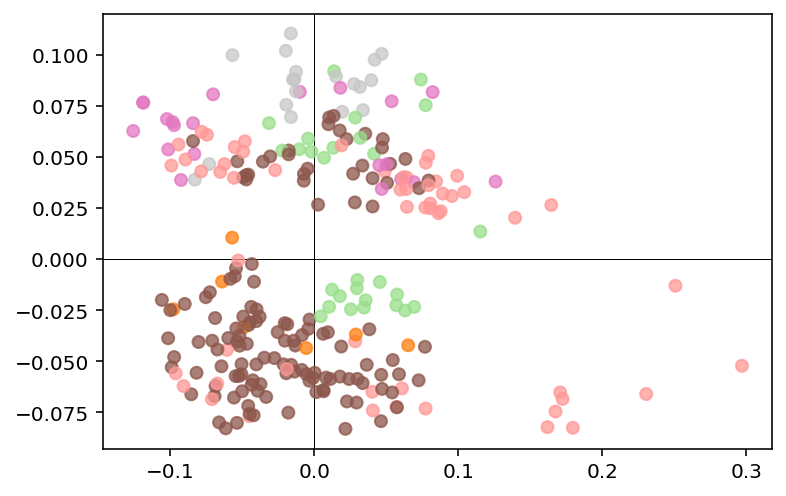

In [24]:
plt.scatter(X_[:,0], X_[:,1], alpha=.75, zorder=3, c=c)
plt.axhline(0, lw=.5, c="k")
plt.axvline(0, lw=.5, c="k")
plt.show()

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=2, metric="cosine", perplexity=25)

In [27]:
X__ = tsne.fit_transform(X)

/home/fmoss/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/fmoss/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/fmoss/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


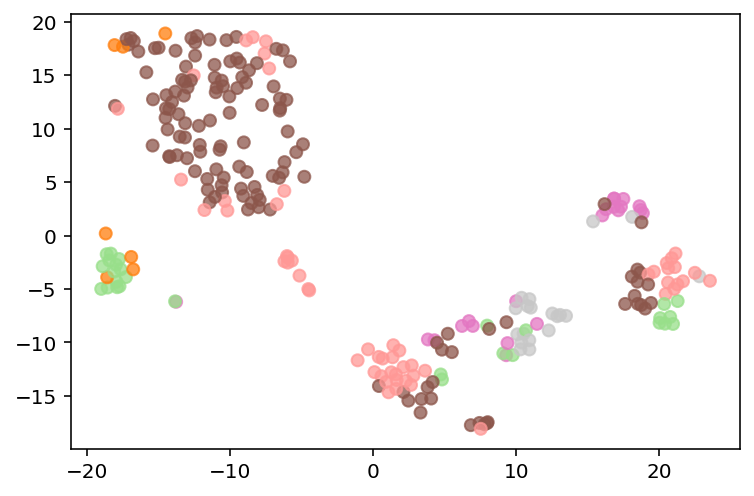

In [28]:
plt.scatter(X__[:,0], X__[:,1], alpha=.75, zorder=3, c=c)
plt.show()

In [29]:
corpus.scores[3].analyses["note_list"][4].note

<music21.note.Note D>